In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [20]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [21]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [22]:
df

,Day,Millons of pounds in sales
0,1,2.0
1,2,8.0
2,3,20.0
3,4,13.0
4,5,5.0
5,6,9.0
6,7,10.0
7,8,8.0
8,9,22.0
9,10,10.0


In [23]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

# ----> defining a function to determine the mean of array ros
def mean_of_array_rows(numbers):
    l = []
    for i in range(len(numbers)):
        l.append(np.average(numbers[i]))
    return np.array(l)



def bootstrap_mean(x, sample_size, n_bootstraps):
    # <---INSERT YOUR CODE HERE--->
    n_bootstrap_array = []
    ci_data_mean_array = []

    
    for i in range(n_bootstraps):
        b_sample = np.random.choice(x,sample_size)
        n_bootstrap_array.append(b_sample)
    data_mean_array = np.sort(mean_of_array_rows(n_bootstrap_array))[::-1]
    
    ci = 95/100
    l= (1-ci)/2
    btm = l
    top = ci + l
    for element in data_mean_array:
        if (element >= np.quantile(data_mean_array,btm)) and (element <= np.quantile(data_mean_array,top)):
            ci_data_mean_array.append(element)
    data_mean=np.mean(ci_data_mean_array)
    lower = min(ci_data_mean_array)
    upper = max(ci_data_mean_array)
 





    return data_mean, lower, upper


/usr/local/Cellar/jupyterlab/3.1.14/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50000.0)

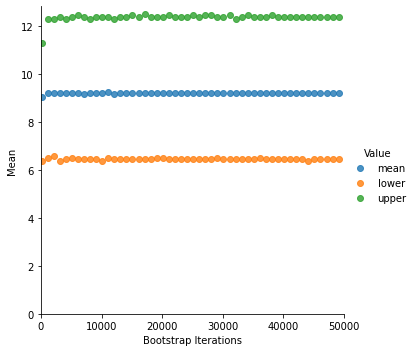

In [24]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)


Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [25]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
    n_bootstrap_array = []
    ci_data_mean_array = []
    for i in range(n_bootstraps):
        b_sample = np.random.choice(sample,sample_size)
        n_bootstrap_array.append(b_sample)
    data_mean_array = np.sort(mean_of_array_rows(n_bootstrap_array))[::-1]
    ci = ci/100
    l= (1-ci)/2
    btm = l
    top = ci + l
    for element in data_mean_array:
        if (element >= np.quantile(data_mean_array,btm)) and (element <= np.quantile(data_mean_array,top)):
            ci_data_mean_array.append(element)
    data_mean=np.mean(ci_data_mean_array)
    lower = min(ci_data_mean_array)
    upper = max(ci_data_mean_array)
    return data_mean, lower, upper    
        
    

/usr/local/Cellar/jupyterlab/3.1.14/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50000.0)

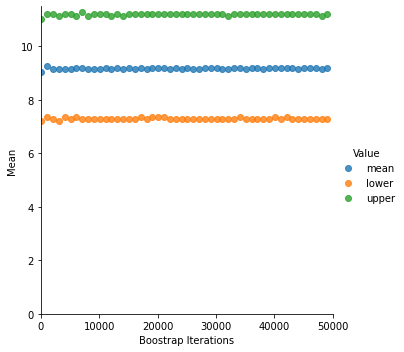

In [26]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [27]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots


In [28]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

In [29]:
df

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


/usr/local/Cellar/jupyterlab/3.1.14/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/Cellar/jupyterlab/3.1.14/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/Cellar/jupyterlab/3.1.14/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  war

<AxesSubplot:>

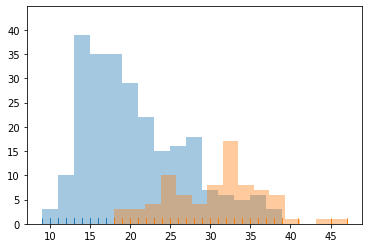

In [30]:
data = df[df.columns[0]].values
sns.distplot(data, bins=15, kde=False, rug=True) # Histogram
data = df[df.columns[1]].values
sns.distplot(data, bins=15, kde=False, rug=True) # Histogram

/usr/local/Cellar/jupyterlab/3.1.14/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


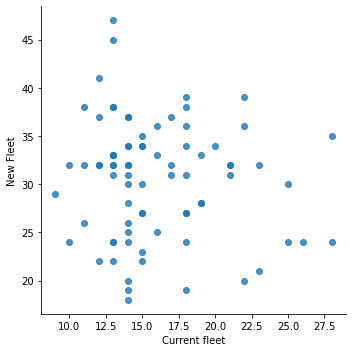

In [31]:
sns.lmplot(df.columns[0], df.columns[1], data=df, fit_reg=False)

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

np.mean(df[df.columns[1]].fillna(value = 0))

In [32]:
df[df.columns[0]].shape

(249,)

In [33]:
# <---INSERT YOUR CODE HERE--->
mean_curr = np.mean(df[df.columns[0]])
mean_new = np.mean(df[df.columns[1]])
t_obs = mean_new - mean_curr

In [34]:
mean_curr,mean_new,t_obs

(20.14457831325301, 30.481012658227847, 10.336434344974837)

In [35]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data = df[df.columns[0]].dropna().values
print('------------------------------------------Current fleet-------------------------------------------------------------------')
print('''\
Mean is %5.2f
lower bound ------>       %5.2f
Upper bound ------>       %5.2f
'''%(bootstrap_mean_ci(data, data.shape[0], 10000, 95)))
print('------------------------------------------new fleet-------------------------------------------------------------------')
data = df[df.columns[1]].dropna().values
print('''\
Mean is %5.2f
lower bound ------>       %5.2f
Upper bound ------>       %5.2f
'''%(bootstrap_mean_ci(data, data.shape[0], 10000, 95)))

------------------------------------------Current fleet-------------------------------------------------------------------
Mean is 20.14
lower bound ------>       19.37
Upper bound ------>       20.95

------------------------------------------new fleet-------------------------------------------------------------------
Mean is 30.48
lower bound ------>       29.16
Upper bound ------>       31.82



In [61]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    t_old = np.mean(sample1)
    t_new = np.mean(sample2)
    t_obs = t_new - t_old
    concat = np.concatenate((sample1, sample2))
    perm_count = 0
    for i in range(n_permutations):
        perm = np.random.permutation(concat)
        p_old = perm[:int(len(perm)/2)]
        p_new = perm[int(len(perm)/2):]
        t_p_old = np.mean(p_old)
        t_p_new = np.mean(p_new)
        t_perm = t_p_new - t_p_old
        if t_perm > t_obs:
            perm_count = perm_count + 1
    pvalue = perm_count/n_permutations
    
    return pvalue

In [62]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
sample1 = df[df.columns[0]]
sample2 = df[df.columns[1]]
p = permut_test(sample1, sample2, 30000)
print('''p-value   ----> %.5f'''%(p))

p-value   ----> 0.00000


#  week 2 Assignment solutions

In [45]:
#2.
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data = df[df.columns[1]].fillna(value = 0).values
print('''\
Mean is %5.2f
lower bound ------>       %5.2f
Upper bound ------>       %5.2f
'''%(bootstrap_mean_ci(data, data.shape[0], 10000, 80)))


Mean is  9.67
lower bound ------>        8.50
Upper bound ------>       10.88



In [44]:
#3.
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print('''\
Mean is %5.2f
lower bound ------>       %5.2f
Upper bound ------>       %5.2f
'''%(bootstrap_mean_ci(data, data.shape[0], 10000, 80)))


Mean is  9.18
lower bound ------>        7.36
Upper bound ------>       11.21



In [51]:
#4.
def std_of_array_rows(numbers):
    l = []
    for i in range(len(numbers)):
        l.append(np.std(numbers[i]))
    return np.array(l)
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
    n_bootstrap_array = []
    ci_data_std_array = []
    for i in range(n_bootstraps):
        b_sample = np.random.choice(sample,sample_size)
        n_bootstrap_array.append(b_sample)
    data_std_array = np.sort(std_of_array_rows(n_bootstrap_array))[::-1]
    ci = ci/100
    l= (1-ci)/2
    btm = l
    top = ci + l
    for element in data_std_array:
        if (element >= np.quantile(data_std_array,btm)) and (element <= np.quantile(data_std_array,top)):
            ci_data_std_array.append(element)
    data_std=np.std(ci_data_std_array)
    lower = min(ci_data_std_array)
    upper = max(ci_data_std_array)
    return data_std, lower, upper 
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data = df[df.columns[0]].dropna().values
print('''\
Standard Deviation is %5.2f
lower bound ------>       %5.2f
Upper bound ------>       %5.2f
'''%(bootstrap_std_ci(data, data.shape[0], 10000, 95)))

Standard Deviation is  0.25
lower bound ------>        5.82
Upper bound ------>        6.95



In [54]:
#5.
def std_of_array_rows(numbers):
    l = []
    for i in range(len(numbers)):
        l.append(np.std(numbers[i]))
    return np.array(l)
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
    n_bootstrap_array = []
    ci_data_std_array = []
    for i in range(n_bootstraps):
        b_sample = np.random.choice(sample,sample_size)
        n_bootstrap_array.append(b_sample)
    data_std_array = np.sort(std_of_array_rows(n_bootstrap_array))[::-1]
    ci = ci/100
    l= (1-ci)/2
    btm = l
    top = ci + l
    for element in data_std_array:
        if (element >= np.quantile(data_std_array,btm)) and (element <= np.quantile(data_std_array,top)):
            ci_data_std_array.append(element)
    data_std=np.std(ci_data_std_array)
    lower = min(ci_data_std_array)
    upper = max(ci_data_std_array)
    return data_std, lower, upper 
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
data = df[df.columns[0]].dropna().values
print('''\
Standard Deviation is %5.2f
lower bound ------>       %5.2f
Upper bound ------>       %5.2f
'''%(bootstrap_std_ci(data, data.shape[0], 10000, 73)))

Standard Deviation is  0.17
lower bound ------>        6.06
Upper bound ------>        6.70



In [63]:
#7.
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
sample1 = df[df.columns[0]]
sample2 = df[df.columns[1]]
permut_test(sample1, sample2, 30000)

0.0

In [66]:
#8.
# Load the data
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]
sample1 = np.array(dem_share_OH)
sample2 = np.array(dem_share_PA)
#dem_share_OH
data = sample1
print('''\
(OH)Mean is %5.2f
(OH)lower bound ------>       %5.2f
(OH)Upper bound ------>       %5.2f
'''%(bootstrap_mean_ci(data, data.shape[0], 100000, 98)))
#dem_share_PA
data = sample2
print('''\
(PA)Mean is %5.2f
(PA)lower bound ------>       %5.2f
(PA)Upper bound ------>       %5.2f
'''%(bootstrap_mean_ci(data, data.shape[0], 100000, 98)))

p = permut_test(sample1, sample2, 30000)
print('''p-value   ----> %.5f'''%(p))

(OH)Mean is 44.32
(OH)lower bound ------>       41.84
(OH)Upper bound ------>       46.76

(PA)Mean is 45.48
(PA)lower bound ------>       42.79
(PA)Upper bound ------>       48.36

p-value   ----> 0.23383
